# AirBnB Fair Valuation
Welcome to Airbnb Analysis Corp.! Your task is to set the competitive daily accomodation rate for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a fair value that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!

The owner has been a host since August 2010

The location is lon:151.274506, lat:33.889087

The current review score rating 95.0

Number of reviews 53

Minimum nights 4

The house can accomodate 10 people.

The owner currently charges a cleaning fee of 370

The house has 3 bathrooms, 5 bedrooms, 7 beds.

The house is available for 255 of the next 365 days

The client is verified, and they are a superhost.

The cancelation policy is strict with a 14 days grace period.

The host requires a security deposit of $1,500

In [1]:
# Defining our Sample Client Data
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 't'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 't'
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.display.max_columns = None

In [3]:
from pathlib import Path

github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Done


C:\Users\Admin\AppData\Local\Temp\ipykernel_20464\645489121.py:10: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')


In [4]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,As much as they want.,Be considerate. No showering after 2330h.,https://a0.muscache.com/im/pictures/2797669/17...,40855,https://www.airbnb.com/users/show/40855,Colleen,23/09/09,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",within a day,67%,t,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, NSW, Australia",Potts Point,Sydney,NaN,Potts Point,NSW,2011,Sydney,"Potts Point, Australia",AU,Australia,-33.869168,151.226562,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,Kitchen,Elevator,""Buzzer/wireless intercom...",NaN,$65.00,NaN,NaN,NaN,NaN,1,$0.00,2,180,4 weeks ago,t,9,39,69,339,177,5/12/09,1/07/18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,https://a0.muscache.com/im/pictures/763ad5c8-c...,17061,https://www.airbnb.com/users/show/17061,Stuart,14/05/09,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within an hour,100%,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$98.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,yesterday,t,13,30,45,188,468,24/07/10,27/06/18,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully reno

In [5]:
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 

df = df[incl]

In [6]:
# Importing regex
import re

# The price fields in our data frame
price_list = ["price","cleaning_fee","security_deposit"]

# We change any blanks to 0 and use our regex function to remove anything that isn't a number (or negative number which is changed to 0)
for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

df['host_since'] = pd.to_datetime(df['host_since'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   27070 non-null  float64       
 1   city                    27037 non-null  object        
 2   longitude               27070 non-null  float64       
 3   latitude                27070 non-null  float64       
 4   review_scores_rating    19512 non-null  float64       
 5   number_of_reviews       27070 non-null  int64         
 6   minimum_nights          27070 non-null  int64         
 7   security_deposit        27070 non-null  float64       
 8   cleaning_fee            27070 non-null  float64       
 9   accommodates            27070 non-null  int64         
 10  bathrooms               27048 non-null  float64       
 11  bedrooms                27062 non-null  float64       
 12  beds                    27037 non-null  float6

Finding Outlier

<Axes: ylabel='price'>

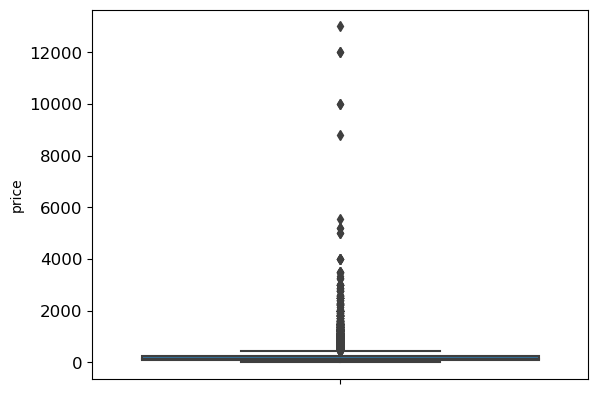

In [8]:
import seaborn as sns

sns.boxplot( y=df["price"] )

In [9]:
df["price"].skew()

13.808558337216192

Pandas Kurtosis Function
Describe:

· Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier

· Kurtosis describes the peakedness of the distribution.

· If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

· Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0.

In [10]:
df["price"].kurtosis()

413.4301463784445

In [11]:
print(df["price"].quantile(0.995))
print(df["price"].mean())
print(df["price"].median())

1600.0
209.27879571481344
135.0


In [12]:
#Removing outlier
df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)

In [13]:
df["price"].skew()

2.957872457159033

In [14]:
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [15]:
print(df["cancellation_policy"].value_counts())
print(df["city"].value_counts())
print(df["property_type"].value_counts())
print(df["room_type"].value_counts())

strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: cancellation_policy, dtype: int64
Bondi Beach                1671
Manly                       958
Surry Hills                 919
Bondi                       785
Randwick                    684
                           ... 
Bar Point                     1
Rozelle / Balmain             1
Bondi Junction - Sydney       1
Maraylya                      1
Kensignton                    1
Name: city, Length: 741, dtype: int64
Apartment                 15901
House                      7722
Townhouse                  1145
Condominium                 351
Guest suite                 350
Guesthouse                  287
Villa                       201
Loft                        175
Bed and breakfast           156
Other                       147
Bungalow                    118
Cabin                        77
S

Saving figure attribute_histogram_plots


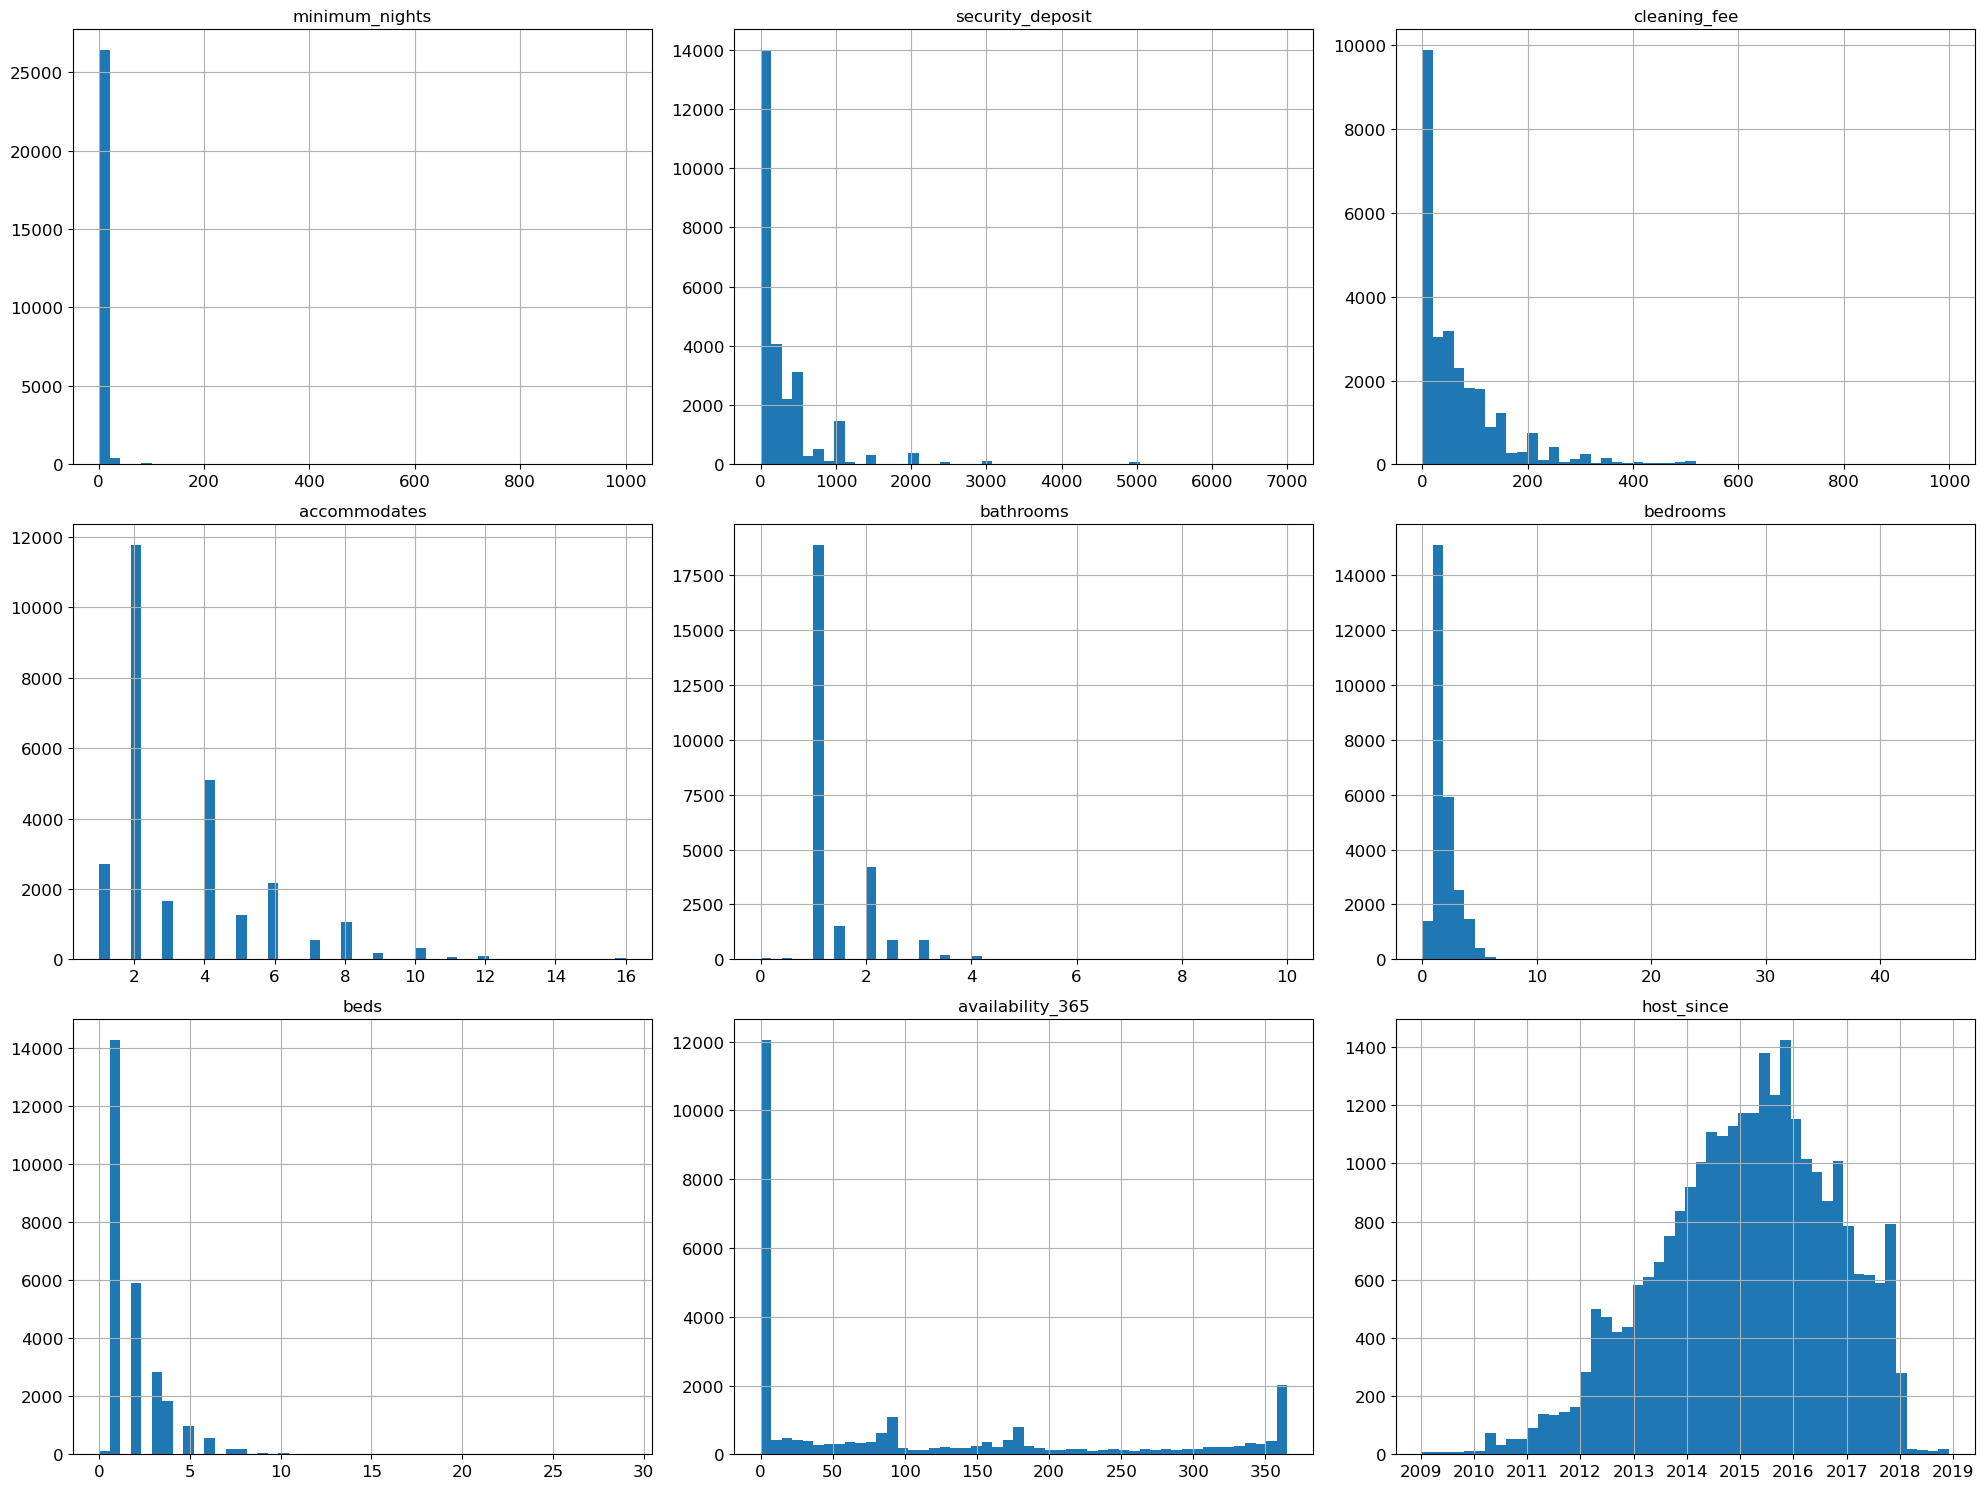

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

try:
    # We select all rows and all columns after the 6th
    df.iloc[:,6:].hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass

In [17]:
df["city"].value_counts().head(10)

Bondi Beach     1671
Manly            958
Surry Hills      919
Bondi            785
Randwick         684
Sydney           682
Coogee           675
Darlinghurst     660
North Bondi      629
Newtown          490
Name: city, dtype: int64

In [32]:
plt.figure(figsize=(500,25))
ax = sns.countplot(x="city", data=df)
ax.tick_params(axis='x', labelrotation=90)

In [22]:
# We now remove the rare occurences in categories as it's necessary for the cross validation step
# the below step is somewhat similar for what has been done with cities above

# We store the counts of each type in the variable item_counts
item_counts = df.groupby(['property_type']).size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
df = df[~df["property_type"].isin(rare_items)].reset_index(drop=True)

# Sanity check
df["property_type"].value_counts()

Apartment             15901
House                  7722
Townhouse              1145
Condominium             351
Guest suite             350
Guesthouse              287
Villa                   201
Loft                    175
Bed and breakfast       156
Other                   147
Bungalow                118
Cabin                    77
Serviced apartment       74
Cottage                  60
Hostel                   53
Boutique hotel           25
Boat                     18
Tent                     13
Hotel                    13
Name: property_type, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

In [27]:
# We need to convert our categorical columns to numeric, so we use the sklearn's funtion LabelEncoder to do this
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ["city"]:
    df[col+"_code"] = le.fit_transform(df[col])

Stratified Shuffle Split cross-validator
Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [48]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df["city_code"]):
    del df["city_code"]
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [50]:
df.groupby("city")["price"].mean()

city
 Bondi Beach              221.0
 Coogee ,Sydney           165.0
2095                      390.0
9/20 botany street         50.0
Abbotsford                189.0
                          ...  
sydney                    196.0
zetland                   139.0
Áü≥Ë∞∑Â∏Ç                   0.0
ÊÇâÂ∞ºÂ∏Ç                 159.0
Ïõ¨Ìä∏ÏõåÏä§ Ìè¨Ïù∏Ìä∏    229.0
Name: price, Length: 739, dtype: float64

In [51]:
traval = df.copy() ##traval - training and validation set

Saving figure bad_visualization_plot


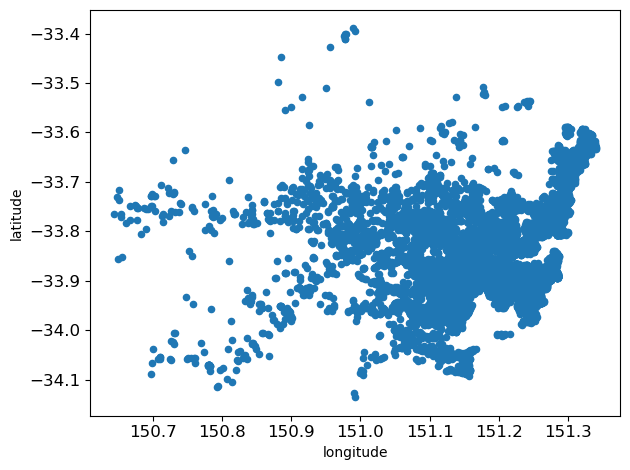

In [52]:
traval.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


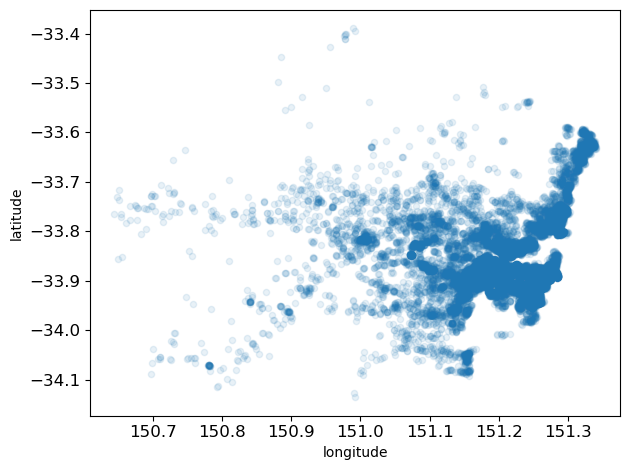

In [53]:
traval.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

In [54]:
traval_co = traval[(traval["longitude"]>151.16)&(traval["latitude"]<-33.75)].reset_index(drop=True)

traval_co = traval_co[traval_co["latitude"]>-33.95].reset_index(drop=True)

# And only look at locations under $600
traval_co = traval_co[traval_co["price"]<600].reset_index(drop=True)

Saving figure housing_prices_scatterplot


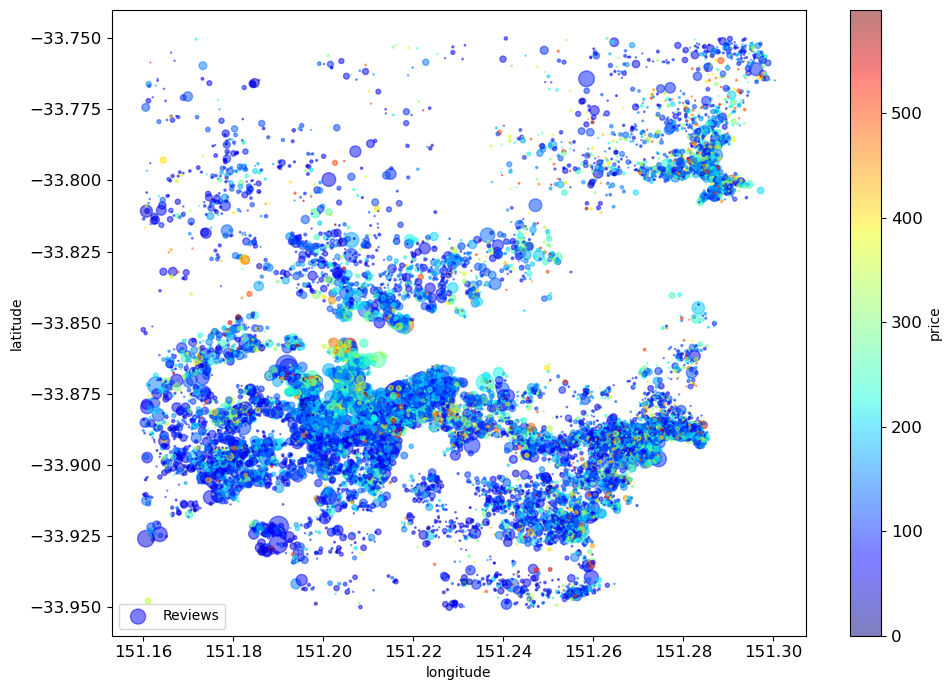

In [55]:
traval_co.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=traval_co["number_of_reviews"]/2, label="Reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

C:\Users\Admin\AppData\Local\Temp\ipykernel_20464\3672850006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = traval.corr()


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

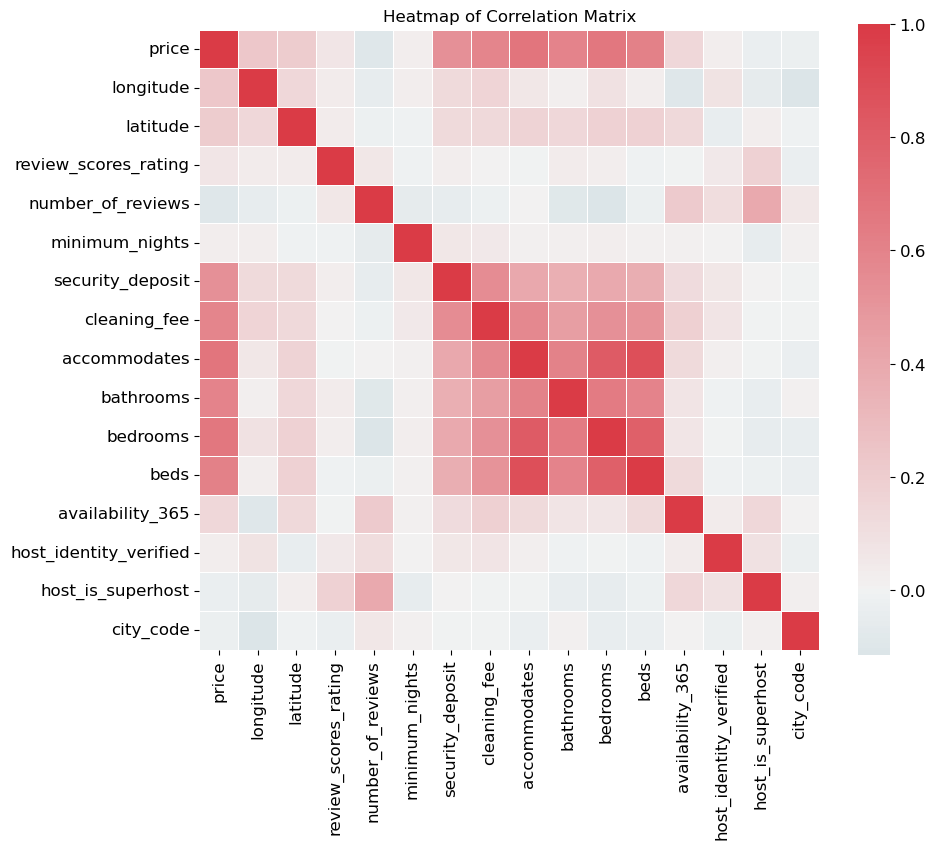

In [56]:
corr_matrix = traval.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [57]:
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
accommodates              0.677765
bedrooms                  0.668078
beds                      0.616149
bathrooms                 0.599365
cleaning_fee              0.587529
security_deposit          0.527803
longitude                 0.230743
latitude                  0.204064
availability_365          0.144570
review_scores_rating      0.067847
minimum_nights            0.027450
host_identity_verified    0.025723
city_code                -0.026255
host_is_superhost        -0.035688
number_of_reviews        -0.092712
Name: price, dtype: float64

Saving figure scatter_matrix_plot


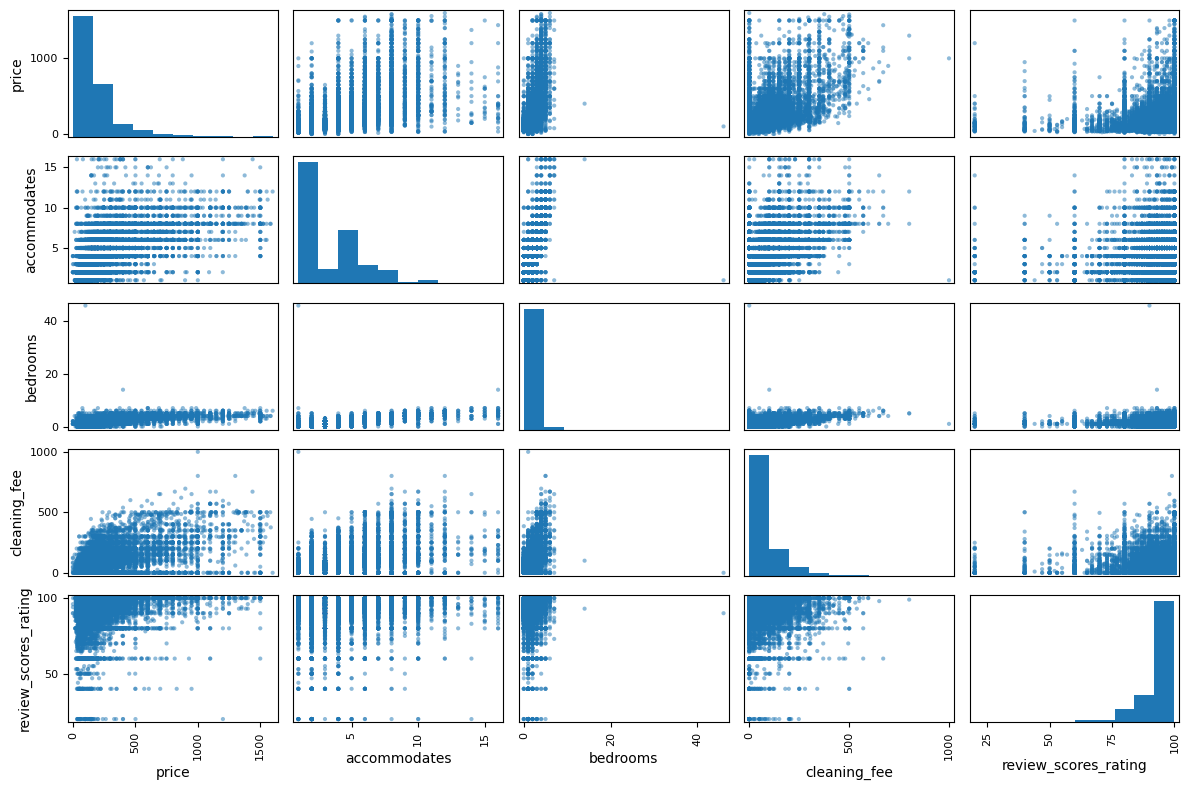

In [58]:
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee","review_scores_rating"]
scatter_matrix(traval[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


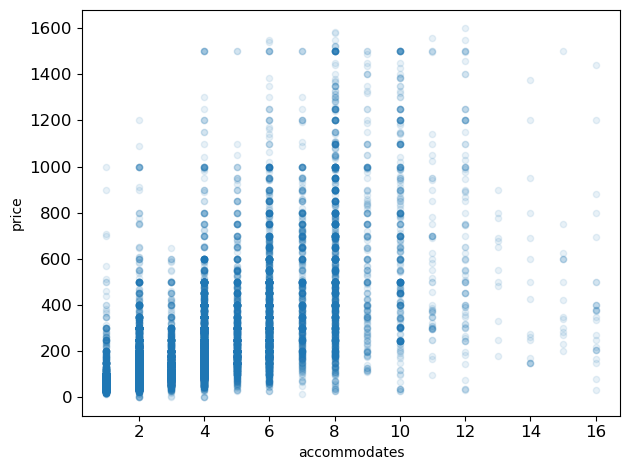

In [59]:
traval.plot(kind="scatter", x="accommodates", y="price", alpha=0.1)
save_fig("income_vs_house_value_scatterplot")

In [60]:
traval["bedrooms_per_person"] = traval["bedrooms"]/traval["accommodates"]
traval["bathrooms_per_person"] = traval["bathrooms"]/traval["accommodates"]
traval['host_since'] = pd.to_datetime(traval['host_since'])
traval['days_on_airbnb'] = (pd.to_datetime('today') - traval['host_since']).dt.days